# 数据不平衡

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE # 过抽样处理库SMOTE
from imblearn.under_sampling import RandomUnderSampler # 欠抽样处理库RandomUnderSampler
from sklearn.svm import SVC #SVM中的分类算法SVC
from imblearn.ensemble import EasyEnsemble # 简单集成方法EasyEnsemble


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import scikitplot as skplt

In [ ]:
from sklearn.

In [3]:
df=pd.read_csv(r'C:\Users\CDA\机器学习-CDA\评分卡\WoeData.csv',encoding="utf8")

In [4]:
df.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-1.180084,-0.116180,0.524292,0.115927,0.123763,0.132735,0.381095,0.239587,0.268163,-0.223785,0
1,1.229443,0.269706,0.524292,0.087737,-0.360108,-0.037671,0.381095,0.239587,0.268163,0.154085,0
2,1.229443,-0.278619,-0.893231,0.087737,-0.360108,-0.037671,0.381095,-0.250985,0.268163,0.154085,0
3,0.190773,0.269706,0.524292,-0.473036,0.247881,0.132735,0.381095,0.239587,0.268163,-0.111830,0
4,1.229443,-0.278619,0.524292,0.087737,0.456591,0.132735,0.381095,0.239587,0.268163,-0.111830,0


In [5]:
df.dropna(inplace=True)

In [6]:
x = df.iloc[:, :-1] # 切片，得到输入x
y = df.iloc[:, -1] # 切片，得到标签y

In [7]:
groupby_data_orgianl = df.groupby('SeriousDlqin2yrs').count()
print (groupby_data_orgianl) 

                  RevolvingUtilizationOfUnsecuredLines    age  \
SeriousDlqin2yrs                                                
0                                                94953  94953   
1                                                 6794   6794   

                  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  \
SeriousDlqin2yrs                                                    
0                                                94953      94953   
1                                                 6794       6794   

                  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
SeriousDlqin2yrs                                                   
0                         94953                            94953   
1                          6794                             6794   

                  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
SeriousDlqin2yrs                                                          
0                                   949

## 使用SMOTE方法进行过抽样处理

In [8]:
model_smote = SMOTE() # 建立SMOTE模型对象

In [9]:
x_smote,y_smote=model_smote.fit_sample(x,y)

In [10]:
x_smote=pd.DataFrame(x_smote,columns=x.columns)
y_smote=pd.DataFrame(y_smote,columns=['SeriousDlqin2yrs'])

In [11]:
y_smote['SeriousDlqin2yrs'].value_counts()

1    94953
0    94953
Name: SeriousDlqin2yrs, dtype: int64

## 使用RandomUnderSampler方法进行欠抽样处理

In [13]:
model_RandomUnderSampler = RandomUnderSampler() # 建立RandomUnderSampler模型对象
x_RandomUnderSampler, y_RandomUnderSampler =model_RandomUnderSampler.fit_sample(x,y) # 输入数据并作欠抽样处理
x_RandomUnderSampler =pd.DataFrame(x_RandomUnderSampler,columns=x.columns)
# 将数据转换为数据框并命名列名
y_RandomUnderSampler =pd.DataFrame(y_RandomUnderSampler,columns=['SeriousDlqin2yrs']) # 将数据转换为数据框并命名列名

In [14]:
y_RandomUnderSampler['SeriousDlqin2yrs'].value_counts()

1    6794
0    6794
Name: SeriousDlqin2yrs, dtype: int64

## 使用SVM的权重调节处理不均衡样本

In [15]:
model_svm = SVC(kernel='linear',class_weight='balanced',degree=1) # 创建SVC模型对象并指定类别权重
model_svm.fit(x, y) # 输入x和y并训练模型

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## 使用集成方法EasyEnsemble处理不均衡样本

In [18]:
model_EasyEnsemble = EasyEnsemble() # 建立EasyEnsemble模型对象
x_EasyEnsemble, y_EasyEnsemble=model_EasyEnsemble.fit_sample(x, y) # 输入数据并应用集成方法处理
print (x_EasyEnsemble.shape) # 打印输出集成方法处理后的x样本集概况
print (y_EasyEnsemble.shape) # 打印输出集成方法处理后的y标签集概况

C:\Users\CDA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class EasyEnsemble is deprecated; EasyEnsemble is deprecated in 0.4 and will be removed in 0.6. Use EasyEnsembleClassifier instead.
  warnings.warn(msg, category=DeprecationWarning)


(10, 13588, 10)
(10, 13588)


In [25]:
index_num = 1 # 设置抽样样本集索引
x_EasyEnsemble_resample =pd.DataFrame(x_EasyEnsemble[index_num],columns=x.columns)
# 将数据转换为数据框并命名列名
y_EasyEnsemble_resample =pd.DataFrame(y_EasyEnsemble[index_num],columns=['SeriousDlqin2yrs']) # 将数据转换为数据框并命名列名

# 逻辑回归 

## SMOTE方法

In [27]:
xtrain_smo,xtest_smo,ytrain_smo,ytest_smo=train_test_split(x_smote,y_smote,test_size=0.3,random_state=420)

In [28]:
clf=LogisticRegression().fit(xtrain_smo,ytrain_smo)

C:\Users\CDA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CDA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
print(accuracy_score(clf.predict(xtest_smo),ytest_smo))
print(precision_score(clf.predict(xtest_smo),ytest_smo))
print(f1_score(clf.predict(xtest_smo),ytest_smo))

0.7749947342554238
0.7353269203959292
0.7669908206852677


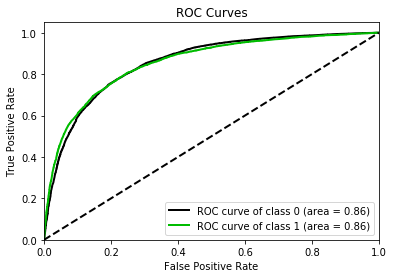

In [34]:
pre=clf.predict_proba(xtest_smo)
pre_df = pd.DataFrame(pre,columns=[0,1])
skplt.metrics.plot_roc(ytest_smo,pre_df,plot_micro=False,plot_macro=False)

## RandomUnderSampler方法

In [37]:
xtrain_rand,xtest_rand,ytrain_rand,ytest_rand=train_test_split(x_RandomUnderSampler, y_RandomUnderSampler,test_size=0.3,random_state=420)

In [38]:
clf1=LogisticRegression().fit(xtrain_rand,ytrain_rand)

C:\Users\CDA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CDA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
print(accuracy_score(clf.predict(xtest_rand),ytest_rand))
print(precision_score(clf.predict(xtest_rand),ytest_rand))
print(f1_score(clf.predict(xtest_rand),ytest_rand))

0.7662496934020113
0.7363013698630136
0.759525611910169


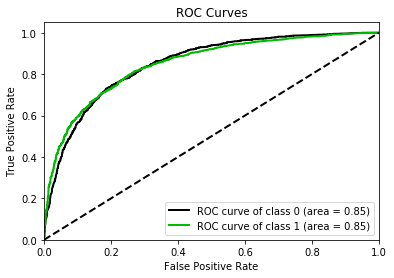

In [40]:
pre1=clf1.predict_proba(xtest_rand)
pre_df1 = pd.DataFrame(pre1,columns=[0,1])
skplt.metrics.plot_roc(ytest_rand,pre_df1,plot_micro=False,plot_macro=False)

## 集成方法EasyEnsemble

In [43]:
x_EasyEnsemble.shape[2]

10

In [44]:
score1=[]
score2=[]
score3=[]
for i in range(x_EasyEnsemble.shape[2]):
    x_EasyEnsemble_resample =pd.DataFrame(x_EasyEnsemble[i],columns=x.columns)
    # 将数据转换为数据框并命名列名
    y_EasyEnsemble_resample =pd.DataFrame(y_EasyEnsemble[i],columns=['SeriousDlqin2yrs'])
    xtrain_easy,xtest_easy,ytrain_easy,ytest_easy=train_test_split(x_EasyEnsemble_resample,y_EasyEnsemble_resample ,test_size=0.3,random_state=420)
    clf1=LogisticRegression().fit(xtrain_easy,ytrain_easy)
    score1.append(accuracy_score(clf.predict(xtest_easy),ytest_easy))
    score2.append(accuracy_score(clf.predict(xtest_easy),ytest_easy))
    score3.append(accuracy_score(clf.predict(xtest_easy),ytest_easy))
    

C:\Users\CDA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CDA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\CDA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CDA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\CDA\Anaconda3\lib\site-packages\sklearn\linear_model\logi

In [46]:
import matplotlib.pyplot as plt

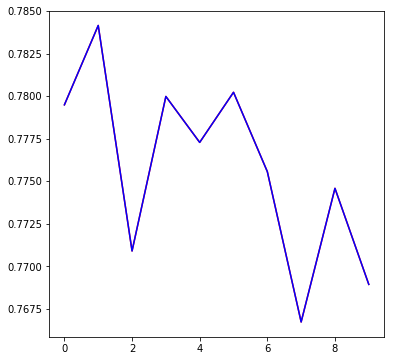

In [50]:
plt.figure(figsize=(6,6))
plt.plot(range(10),score1,c='r')
plt.plot(range(10),score2,c='b')